# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import metrics

# Loading Dataset

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Projects/Data/MLLRP2_Houseprice_prediction.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,03/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,03/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,04/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,04/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,04/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


# Pre-processing Data

In [ ]:
df.shape

(34857, 21)

In [ ]:
df.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [ ]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [ ]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [ ]:
df1=df.drop(['Address','Date','Postcode','YearBuilt','Lattitude','Longtitude'],axis=1)

In [ ]:
df1.isnull().sum()

Suburb               0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Distance             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
CouncilArea          3
Regionname           3
Propertycount        3
dtype: int64

In [ ]:
df1.loc[:,['Bathroom','Bedroom2','Car']]=df1.loc[:,['Bathroom','Bedroom2','Car']].fillna(0)

In [ ]:
m1=df1['Landsize'].mean()
m2=df1['BuildingArea'].mean()
df1['Landsize'].fillna(m1,inplace=True)
df1['BuildingArea'].fillna(m2,inplace=True)

In [ ]:
df1.isnull().sum()

Suburb              0
Rooms               0
Type                0
Price            7610
Method              0
SellerG             0
Distance            1
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
CouncilArea         3
Regionname          3
Propertycount       3
dtype: int64

In [ ]:
df2=df1.dropna()
df2.shape

(27244, 15)

In [ ]:
df2.dtypes

Suburb            object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Distance         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
CouncilArea       object
Regionname        object
Propertycount    float64
dtype: object

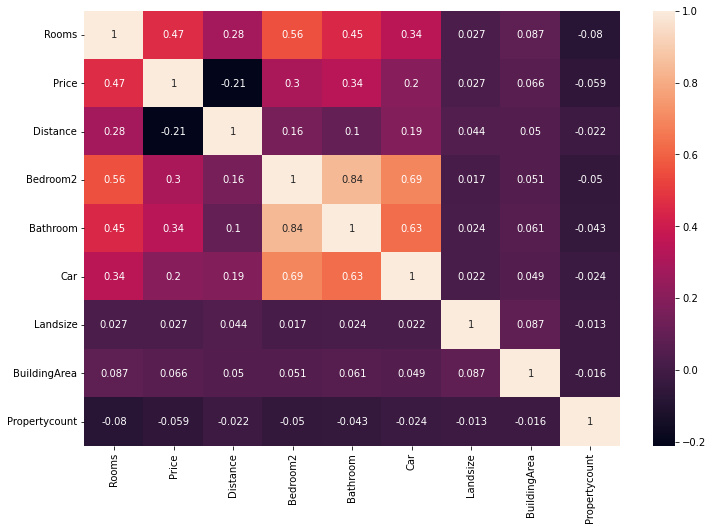

In [ ]:
cor=df2.corr()
plt.figure(figsize=(12,8))
sns.heatmap(cor,annot=True)

In [ ]:
df2.CouncilArea.unique()

array(['Yarra City Council', 'Moonee Valley City Council',
       'Port Phillip City Council', 'Darebin City Council',
       'Hobsons Bay City Council', 'Stonnington City Council',
       'Boroondara City Council', 'Monash City Council',
       'Glen Eira City Council', 'Whitehorse City Council',
       'Maribyrnong City Council', 'Bayside City Council',
       'Moreland City Council', 'Manningham City Council',
       'Melbourne City Council', 'Banyule City Council',
       'Brimbank City Council', 'Kingston City Council',
       'Hume City Council', 'Knox City Council', 'Maroondah City Council',
       'Casey City Council', 'Melton City Council',
       'Greater Dandenong City Council', 'Nillumbik Shire Council',
       'Whittlesea City Council', 'Frankston City Council',
       'Macedon Ranges Shire Council', 'Yarra Ranges Shire Council',
       'Wyndham City Council', 'Cardinia Shire Council',
       'Moorabool Shire Council', 'Mitchell Shire Council'], dtype=object)

In [ ]:
col=df2.columns
col

Index(['Suburb', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Distance',
       'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea',
       'CouncilArea', 'Regionname', 'Propertycount'],
      dtype='object')

In [ ]:
df3=df2.drop(['Bedroom2'],axis=1)

In [ ]:
df3.dtypes

Suburb            object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Distance         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
CouncilArea       object
Regionname        object
Propertycount    float64
dtype: object

In [ ]:
oo=pd.DataFrame(df3.groupby(df3['Suburb'])['Car'].count().reset_index())
oo

,Suburb,Car
0,Abbotsford,102
1,Aberfeldie,70
2,Airport West,151
3,Albanvale,9
4,Albert Park,93
...,...,...
339,Yallambie,45
340,Yarra Glen,1
341,Yarraville,250
342,croydon,1


In [ ]:
oo1=oo[oo['Car']<50]
oo1

,Suburb,Car
3,Albanvale,9
8,Altona Meadows,26
10,Ardeer,23
15,Aspendale,28
16,Aspendale Gardens,16
...,...,...
337,Wonga Park,2
339,Yallambie,45
340,Yarra Glen,1
342,croydon,1


In [ ]:
for x in df3['Suburb']:
  if x in list(oo1.Suburb):
    df3['Suburb'].replace(x,'other',inplace=True)
  else:
    x
len(df3.Suburb.unique())

161

In [ ]:
def un():
  for cl in df3.columns:
    if (df3[cl].dtype!=int) & (df3[cl].dtype!=float):
      p=df3[cl].unique()
      print(len(p),p)

In [ ]:
un()

161 ['Abbotsford' 'Airport West' 'Albert Park' 'Alphington' 'Altona'
 'Altona North' 'Armadale' 'Ascot Vale' 'Ashburton' 'Ashwood'
 'Avondale Heights' 'Balaclava' 'Balwyn' 'Balwyn North' 'Bentleigh'
 'Bentleigh East' 'Box Hill' 'Braybrook' 'Brighton' 'Brighton East'
 'Brunswick' 'Brunswick West' 'Bulleen' 'Burwood' 'Camberwell'
 'Canterbury' 'Carlton North' 'Carnegie' 'other' 'Caulfield North'
 'Caulfield South' 'Chadstone' 'Clifton Hill' 'Coburg' 'Coburg North'
 'Collingwood' 'Doncaster' 'Elsternwick' 'Elwood' 'Essendon' 'Fairfield'
 'Fitzroy' 'Fitzroy North' 'Flemington' 'Footscray' 'Glen Iris' 'Glenroy'
 'Hadfield' 'Hampton' 'Hampton East' 'Hawthorn' 'Heidelberg Heights'
 'Heidelberg West' 'Hughesdale' 'Ivanhoe' 'Keilor East' 'Kensington' 'Kew'
 'Kew East' 'Maidstone' 'Malvern' 'Malvern East' 'Maribyrnong' 'Melbourne'
 'Middle Park' 'Mont Albert' 'Moonee Ponds' 'Moorabbin' 'Newport'
 'Niddrie' 'North Melbourne' 'Northcote' 'Oak Park' 'Oakleigh South'
 'Pascoe Vale' 'Port Melbourne' 

In [ ]:
df4=df3.drop(['SellerG'],axis=1)

In [ ]:
df4.dtypes

Suburb            object
Rooms              int64
Type              object
Price            float64
Method            object
Distance         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
CouncilArea       object
Regionname        object
Propertycount    float64
dtype: object

In [ ]:
dd=pd.get_dummies(df4[['Suburb','Type','Method','CouncilArea','Regionname']],drop_first=True)
df5=df4.drop(['Suburb','Type','Method','CouncilArea','Regionname'],axis=1)
df5=pd.concat([df5,dd],axis=1)
df5

,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,Propertycount,Suburb_Aberfeldie,Suburb_Airport West,...,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
1,2,1480000.0,2.5,1.0,1.0,202.000000,160.2564,4019.0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,2,1035000.0,2.5,1.0,0.0,156.000000,79.0000,4019.0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,3,1465000.0,2.5,2.0,0.0,134.000000,150.0000,4019.0,0,0,...,0,1,0,0,1,0,0,0,0,0
5,3,850000.0,2.5,2.0,1.0,94.000000,160.2564,4019.0,0,0,...,0,1,0,0,1,0,0,0,0,0
6,4,1600000.0,2.5,1.0,2.0,120.000000,142.0000,4019.0,0,0,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,4,1480000.0,6.3,1.0,3.0,593.000000,160.2564,6543.0,0,0,...,0,0,0,0,0,0,0,0,1,0
34853,2,888000.0,6.3,2.0,1.0,98.000000,104.0000,6543.0,0,0,...,0,0,0,0,0,0,0,0,1,0
34854,2,705000.0,6.3,1.0,2.0,220.000000,120.0000,6543.0,0,0,...,0,0,0,0,0,0,0,0,1,0
34855,3,1140000.0,6.3,0.0,0.0,593.598993,160.2564,6543.0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Seperate Feature data and Target Data

In [ ]:
x=df5.drop(['Price'],axis=1)
y=df5['Price']

In [ ]:
cs=pd.Series(x.columns)

In [ ]:
from sklearn.tree import ExtraTreeRegressor
rg=ExtraTreeRegressor()
rg.fit(x,y)
fe=pd.DataFrame(rg.feature_importances_,columns=['imp'])
pd.concat([cs,fe],axis=1).nlargest(10,'imp')

,0,imp
168,Type_u,0.222530
209,Regionname_Southern Metropolitan,0.135259
2,Bathroom,0.089557
0,Rooms,0.076518
1,Distance,0.072279
4,Landsize,0.059271
167,Type_t,0.038220
5,BuildingArea,0.031447
3,Car,0.021375
193,CouncilArea_Monash City Council,0.017570


In [ ]:
# from sklearn.preprocessing import StandardScaler
# ss=StandardScaler()
# t=ss.fit_transform(x)
# x=pd.DataFrame(t,columns=x.columns)
# x

# Working with Model

## Train model

## Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
from sklearn import linear_model
reg=linear_model.LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
reg.score(x_train,y_train)

0.642915223566276

In [ ]:
reg.score(x_test,y_test)

0.6387164186277732

## Regularization

In [ ]:
from sklearn.linear_model import Ridge,Lasso
def regularization(ra=100,la=100):
  rr=Ridge(alpha=ra,max_iter=1000)
  rr.fit(x_train,y_train)
  print('Ridge_Train_score:\n',rr.score(x_train,y_train))
  print('Ridge_Test_score:\n',rr.score(x_test,y_test))
  ls=Ridge(alpha=la,max_iter=1000)
  ls.fit(x_train,y_train)
  print('Lasso_Train_score:\n',ls.score(x_train,y_train))
  print('Lasso_Test_score:\n',ls.score(x_test,y_test))
regularization(20,20)


Ridge_Train_score:
 0.6389420195866103
Ridge_Test_score:
 0.6352886940022207
Lasso_Train_score:
 0.6389420195866103
Lasso_Test_score:
 0.6352886940022207


## Cross Validation

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRFRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR

In [ ]:
model = [DecisionTreeRegressor,RandomForestRegressor,KNeighborsRegressor,XGBRFRegressor]

for mod in model:
    reg = mod()
    reg = reg.fit(x_train,y_train)
    print(mod , 'accuracy',reg.score(x_test,y_test))

<class 'sklearn.tree._classes.DecisionTreeRegressor'> accuracy 0.5705290869468121
<class 'sklearn.ensemble._forest.RandomForestRegressor'> accuracy 0.7610231448704067
<class 'sklearn.neighbors._regression.KNeighborsRegressor'> accuracy 0.5409449996849506
[12:35:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
<class 'xgboost.sklearn.XGBRFRegressor'> accuracy 0.5253143900661514


In [ ]:
# from sklearn.model_selection import KFold,cross_val_score
# models = []
# models.append(('KNN', KNeighborsRegressor()))
# models.append(('CART', DecisionTreeRegressor()))
# models.append(('RF', RandomForestRegressor()))
# models.append(('XGB', XGBRFRegressor()))

# results = []
# names = []
# for name,model in models:
#     kfold = KFold(n_splits=10)
#     cv_result =cross_val_score(model,x_train,y_train,cv=kfold)
#     names.append(name)
#     results.append(cv_result)
# for i in range(len(names)):
#     print(names[i],results[i].mean())

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.760793506021942

## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}


rf_random = RandomizedSearchCV(estimator = model, 
                               param_distributions = random_grid,
                               scoring='neg_mean_squared_error', 
                               n_iter = 10, cv = 5,
                               verbose=2,
                               random_state=42, n_jobs = 1)

In [ ]:
# rf_random.fit(x_train,y_train)

### best parameter

In [ ]:
rf_random.best_params_

AttributeError: ignored

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(max_depth=20,max_features='auto',min_samples_leaf=1,min_samples_split=15,n_estimators=700)
model.fit(x_train,y_train)
model.score(x_test,y_test)